In [9]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv('datasets/titanic.csv')

In [11]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [12]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

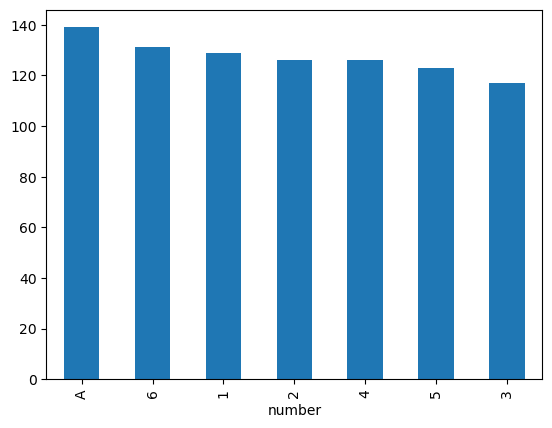

In [13]:
fig=df['number'].value_counts().plot.bar()

In [14]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [15]:
#extarct categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [20]:
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part

df.sample(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_cat,cabin_num
668,NaN,A/5 3536,2,0,2.0,NaN,NaN,NaN
32,NaN,335677,6,1,6.0,NaN,NaN,NaN
462,E63,111320,4,0,4.0,NaN,E,63
752,NaN,345780,3,0,3.0,NaN,NaN,NaN
202,NaN,3101264,2,0,2.0,NaN,NaN,NaN
648,NaN,S.O./P.P. 751,2,0,2.0,NaN,NaN,NaN
600,NaN,243847,A,1,NaN,A,NaN,NaN
829,B28,113572,5,1,5.0,NaN,B,28
428,NaN,364851,2,0,2.0,NaN,NaN,NaN
612,NaN,367230,A,1,NaN,A,NaN,NaN


In [21]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_cat,cabin_num,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,C,85,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,C,123,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,E,46,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN
